In [1]:
import dicom2nifti
import os
import subprocess
from glob import glob
from pathlib import Path
import pandas as pd
import numpy as np
import pydicom

**SAVE DICOM METADATA INTO EASY TO READ CSV**

In [2]:
#Save Dicom meta data into easy to read csv
patient_identifier = []
series_description = []
dcm_path = [] 
dcm_shape = []
modality_path = []
intercept = []
slope = []
rescale_type = []
window_center = []
window_width = []
window_center_width_explanation = []
manufacturer = []
slice_thickness = []
pixel_spacing = []
series_number = []

idx = 0

data_path = Path('Methylation/data/TCGA-GBM').absolute()

for patient in os.listdir(data_path):
    for study in os.listdir(os.path.join(data_path,patient)):
        for sequence in os.listdir(os.path.join(data_path,patient,study)):
            if 'AX' in sequence:
#                 print(os.path.join(data_path,patient,study,sequence))
                for dicom in os.listdir(os.path.join(data_path,patient,study,sequence)):
                    try:
                        dcm = pydicom.dcmread(os.path.join(data_path,patient,study,sequence,dicom))
                        patient_identifier.append(patient)
                        dcm_path.append(os.path.join(data_path,patient,study,sequence,dicom))
                        try:
                            dcm_shape.append(str(dcm.pixel_array.shape))
                        except:
                            dcm_shape.append(np.nan)
                        modality_path.append('/'.join(os.path.join(data_path,patient,study,sequence,dicom).split('/')[:-1]))
                        manufacturer.append(dcm.Manufacturer)
                        slice_thickness.append(dcm.SliceThickness)
                        series_description.append(str(dcm.SeriesDescription).replace(' ','_').replace('__','_'))
                        series_number.append(dcm.SeriesNumber)
                        try:
                            intercept.append(dcm.RescaleIntercept)
                        except:
                            intercept.append(np.nan)
                        try:
                            slope.append(dcm.RescaleSlope)
                        except:
                            slope.append(np.nan) 
                        try:
                            rescale_type.append(dcm.RescaleType)
                        except:
                            rescale_type.append(np.nan)
                        try:
                            window_center.append(dcm.WindowCenter)
                        except:
                            window_width.append(np.nan)
                        try:
                            window_width.append(dcm.WindowWidth)
                        except:
                            window_center.append(np.nan)
                        try:
                            window_center_width_explanation.append(dcm.WindowCenterWidthExplanation)
                        except:
                            window_center_width_explanation.append(np.nan)
                        try:     
                            pixel_spacing.append(dcm.PixelSpacing)
                        except:
                            pixel_spacing.append(np.nan)
                    except Exception as e:
#                         print(os.path.join(data_path,patient,study,sequence,dicom),e)
                        pass
#                 print('')         

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pydicom/filereader.py:313: UserWarning: Expected explicit VR, but found implicit VR - using implicit VR for reading
  warnings.warn(message, UserWarning)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pydicom/charset.py:669: UserWarning: Unknown encoding 'ISO_IR100' - using default encoding instead
  _warn_about_invalid_encoding(encoding)


In [3]:
dcm_meta_data = pd.DataFrame(columns=['Patient ID','SeriesNum','ModalityName','modality_path','dcm_path','dcm_shape','intercept','slope','rescale_type',
                                      'window_center','window_width','window_center_width_explanation',
                                     'manufacturer', 'slice_thickness', 'pixel_spacing'])
dcm_meta_data['Patient ID'] = patient_identifier
dcm_meta_data['SeriesNum'] = series_number
dcm_meta_data['ModalityName'] = series_description
dcm_meta_data['modality_path'] = modality_path
dcm_meta_data['dcm_path'] = dcm_path
dcm_meta_data['dcm_shape'] = dcm_shape
dcm_meta_data['intercept'] = intercept
dcm_meta_data['slope'] = slope
dcm_meta_data['rescale_type'] = rescale_type
dcm_meta_data['window_center'] = window_center
dcm_meta_data['window_width'] = window_width
dcm_meta_data['window_center_width_explanation'] = window_center_width_explanation
dcm_meta_data['manufacturer'] = manufacturer
dcm_meta_data['slice_thickness'] = slice_thickness
dcm_meta_data['pixel_spacing'] = pixel_spacing

In [4]:
dcm_meta_data.to_csv(Path('Methylation/dcm_meta_data.csv').absolute(), index=False)

In [5]:
dcm_meta_data = pd.read_csv(Path('Methylation/dcm_meta_data.csv').absolute())

**LOAD INFO ON WHICH MODALITY EACH VIDEO CORRESPONDS TO, INFO FOUND HERE --> https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5685212/ --> Table 3 **

In [6]:
TCGA_GBM_matching = pd.read_csv(Path('Methylation/TCGA_GBM_matching.csv').absolute())
# TCGA_GBM_matching = TCGA_GBM_matching.loc[~np.isnan(TCGA_GBM_matching['SeriesNum'])]
# TCGA_GBM_matching = TCGA_GBM_matching.astype({'SeriesNum':np.uint8})
TCGA_GBM_matching['ModalityName'] = [str(i).replace('__','_').strip() for i in TCGA_GBM_matching['ModalityName'].values]

In [7]:
#Merge 
patient_info = pd.merge(dcm_meta_data,TCGA_GBM_matching.drop('SeriesNum',axis=1),on=['Patient ID','ModalityName'], how='inner')

In [8]:
patient_info.to_csv(Path('Methylation/patient_info.csv').absolute(),index=False)

In [9]:
patient_info.head()

,Patient ID,SeriesNum,ModalityName,modality_path,dcm_path,dcm_shape,intercept,slope,rescale_type,window_center,...,ImagingFreq,MagneticFieldStrength,SliceSpacing,FlipAngle,SpecificAbsorptionRate,Slices,AcqMatRows,AcqMatCols,PixDim,Series/Modalities_ID
0,TCGA-76-6661,1301,T1_AX_SE,/external_drive/MRI_methylation/Methylation/da...,/external_drive/MRI_methylation/Methylation/da...,"(320, 320)",0.0,1.83663,normalized,418,...,127.7744,3.0,7.5,90.0,3.199997,24.0,304.0,242,0.6875\0.6875,TCGA-76-6661/1.3.6.1.4.1.14519.5.2.1.1188.4001...
1,TCGA-76-6661,1301,T1_AX_SE,/external_drive/MRI_methylation/Methylation/da...,/external_drive/MRI_methylation/Methylation/da...,"(320, 320)",0.0,1.83663,normalized,990,...,127.7744,3.0,7.5,90.0,3.199997,24.0,304.0,242,0.6875\0.6875,TCGA-76-6661/1.3.6.1.4.1.14519.5.2.1.1188.4001...
2,TCGA-76-6661,1301,T1_AX_SE,/external_drive/MRI_methylation/Methylation/da...,/external_drive/MRI_methylation/Methylation/da...,"(320, 320)",0.0,1.83663,normalized,1212,...,127.7744,3.0,7.5,90.0,3.199997,24.0,304.0,242,0.6875\0.6875,TCGA-76-6661/1.3.6.1.4.1.14519.5.2.1.1188.4001...
3,TCGA-76-6661,1301,T1_AX_SE,/external_drive/MRI_methylation/Methylation/da...,/external_drive/MRI_methylation/Methylation/da...,"(320, 320)",0.0,1.83663,normalized,856,...,127.7744,3.0,7.5,90.0,3.199997,24.0,304.0,242,0.6875\0.6875,TCGA-76-6661/1.3.6.1.4.1.14519.5.2.1.1188.4001...
4,TCGA-76-6661,1301,T1_AX_SE,/external_drive/MRI_methylation/Methylation/da...,/external_drive/MRI_methylation/Methylation/da...,"(320, 320)",0.0,1.83663,normalized,512,...,127.7744,3.0,7.5,90.0,3.199997,24.0,304.0,242,0.6875\0.6875,TCGA-76-6661/1.3.6.1.4.1.14519.5.2.1.1188.4001...


**SHOW SOME EXAMPLES OF ALL 4 MODALITIES OF ONE PATIENT**

In [10]:
#Example
patient = 'TCGA-06-0179'
frame = 10
dcm_flair = pydicom.dcmread(sorted(list(patient_info.loc[(patient_info['Patient ID']==patient) & (patient_info['GivenModalityForThisStudy']=='flair'),'dcm_path']))[frame]).pixel_array
dcm_t1 = pydicom.dcmread(sorted(list(patient_info.loc[(patient_info['Patient ID']==patient) & (patient_info['GivenModalityForThisStudy']=='t1'),'dcm_path']))[frame]).pixel_array
dcm_t1Gd = pydicom.dcmread(sorted(list(patient_info.loc[(patient_info['Patient ID']==patient) & (patient_info['GivenModalityForThisStudy']=='t1Gd'),'dcm_path']))[frame]).pixel_array
dcm_t2 = pydicom.dcmread(sorted(list(patient_info.loc[(patient_info['Patient ID']==patient) & (patient_info['GivenModalityForThisStudy']=='t2'),'dcm_path']))[frame]).pixel_array

Text(0.5,1,'t2')

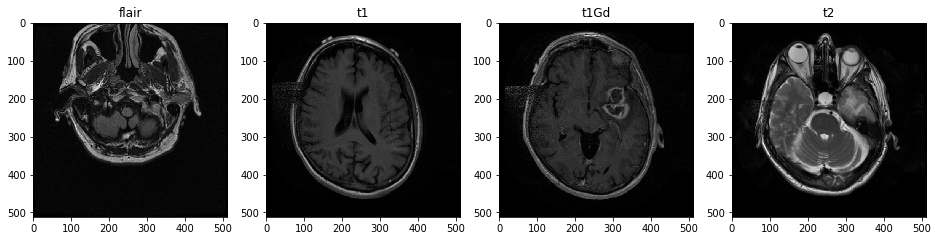

In [12]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1,4,figsize=(16,4))
axs[0].imshow(dcm_flair,cmap='gray')
axs[0].set_title('flair')
axs[1].imshow(dcm_t1,cmap='gray')
axs[1].set_title('t1')
axs[2].imshow(dcm_t1Gd,cmap='gray')
axs[2].set_title('t1Gd')
axs[3].imshow(dcm_t2,cmap='gray')
axs[3].set_title('t2')

**ANALYZE NOISY VS NON-NOISY IMAGES**

In [14]:
import pydicom
dcm_noisy = pydicom.dcmread(str(Path('Methylation/data/TCGA-GBM/TCGA-76-4925/12-16-1995-77300/2-MRPhysicistFLAIR-EP-71787/000000.dcm').absolute()))

In [15]:
import pydicom
dcm_not_noisy = pydicom.dcmread(str(Path('Methylation/data/TCGA-GBM/TCGA-76-4925/12-16-1995-77300/2-MRPhysicistFLAIR-EP-71787/000024.dcm').absolute()))

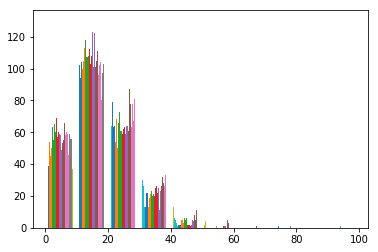

mean--> 17.613327026367188
st dev--> 9.637508296483187


In [16]:
#Seems like noisy images are heavily distributed around 0 
from matplotlib import pyplot as plt
plt.hist(dcm_noisy.pixel_array)
plt.show()
print('mean-->',np.mean(dcm_noisy.pixel_array))
print('st dev-->',np.std(dcm_noisy.pixel_array))

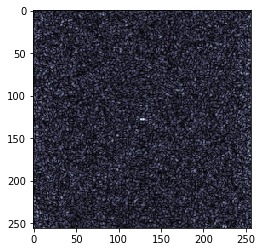

In [17]:
plt.imshow(dcm_noisy.pixel_array,cmap='bone')

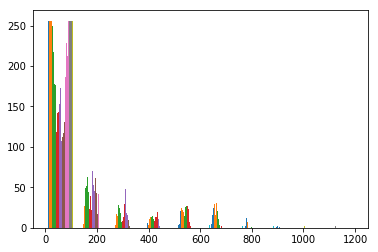

mean--> 104.80123901367188
st dev--> 157.1664210935761


In [18]:
#Seems like clean/non-noisy images are distributed away from 0 
from matplotlib import pyplot as plt
plt.hist(dcm_not_noisy.pixel_array)
plt.show()
print('mean-->',np.mean(dcm_not_noisy.pixel_array))
print('st dev-->',np.std(dcm_not_noisy.pixel_array))

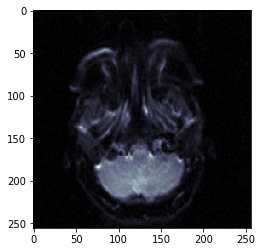

In [19]:
plt.imshow(dcm_not_noisy.pixel_array,cmap='bone')